# [1] Notebook setup

## [1.1] Imports

In [1]:
# system
import os
import sys
abs_path = os.path.abspath(path=os.path.dirname(p="."))
abs_path = os.path.join(os.sep, *abs_path.split(sep=os.sep)[:-2])
sys.path.append(abs_path)
sys.path.append(os.path.join(abs_path, "lib"))

# model
from lib.utils import FaceRecognitionModel, FaceSwapModel

# data
import numpy as np
from pathlib import Path

# visualization
import matplotlib.pyplot as plt
from PIL import Image

## [1.2] Instanciating model

In [2]:
face_rocognition = FaceRecognitionModel()
face_swap = FaceSwapModel(abs_filepath=abs_path)

# [2] Images

In [3]:
image_path_list = list(Path(os.path.join(abs_path, "app", "images")).rglob(pattern="*.jpg"))
print(f"{len(image_path_list)=}")

len(image_path_list)=4


In [4]:
def load_image(image_path: str | Path) -> Image.Image:
    with Image.open(fp=image_path, mode="r") as pil_img:
        return pil_img.convert(mode="RGB").copy()

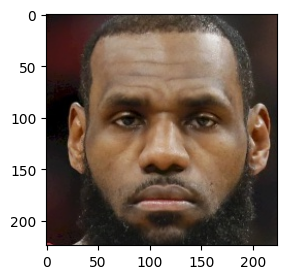

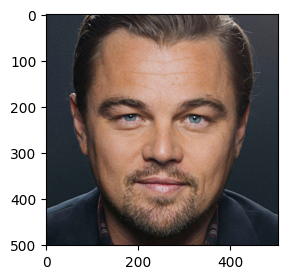

In [5]:
index_1 = 0
index_2 = 1

curr_img_1 = load_image(image_path=image_path_list[index_1])
curr_img_2 = load_image(image_path=image_path_list[index_2])

plt.figure(figsize=(3,3))
plt.imshow(X=np.asarray(a=curr_img_1))
plt.show()

plt.figure(figsize=(3,3))
plt.imshow(X=np.asarray(a=curr_img_2))
plt.show()

## [2.1] Inference

In [6]:
landmarks = face_rocognition(image=curr_img_1)

I0000 00:00:1713817315.049217  370217 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1713817315.054324  370292 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 23.2.1-1ubuntu3.1~22.04.2), renderer: Mesa Intel(R) UHD Graphics (CML GT2)
W0000 00:00:1713817315.054906  370217 face_landmarker_graph.cc:174] Sets FaceBlendshapesGraph acceleration to xnnpack by default.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


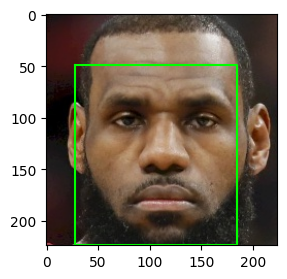

In [7]:
box = landmarks.get("box")

plt.figure(figsize=(3,3))
plt.imshow(X=np.asarray(a=curr_img_1))
plt.plot(
    [box[0], box[2], box[2], box[0], box[0]],
    [box[1], box[1], box[3], box[3], box[1]],
    color="lime"
)
plt.show()

In [8]:
swap = face_swap(src=curr_img_1, tgt=curr_img_2, face_box=box)